### Intro
<hr>

- 영상(Image)이란
    - 픽셀(pixel)이 바둑판 모양의 격자에 나열되어 있는 형태(2차원 행렬)
    - 픽셀(pixel) : 영상의 기본 단위, pictures element, 화소(畵素 : 그림 화 / 본디 소)

<img src="images/markdown/image_expression.png" width="600">
<hr>

- 영상의 표현 방법
    - 그레이스케일(grayscale) 영상
        - 흑백 사진처럼 색사 정보가 없이 오직 밝기 정보만으로 구성된 영상을 의미한다.
    - 그레이스케일 영상의 픽셀 값 표현
        - 밝기 성분을 `0~255` 범위의 정수로 표현한다.
        - 프로그래밍 언어에서 표현하는 방법 : `1Byte` 사용
            - C/C++ -> `unsigned char``
            - Python -> `numpy.uint8`
    - 트루컬러(truecolor) 영상
        - 컬러 사진처럼 색상 정보를 가지고 있어서 다양한 색상을 표현할 수 있는 영상을 의미한다.
        - Red, Green, Blue 색 성분을 256단계로 표현한다.<br>
-> 256<sup>3</sup> = 16,777,216 개의 색상 표현이 가능하다.
    - 트루컬러 영상의 픽셀 값 표현
        - R, G, B 색 성분의 크기를 각각 `0~255` 범위의 정수로 표현한다.
            - 0 : 해당 색 성분이 전혀 없는 상태
            - 255 : 해당 색 성분이 가득 있는 상태
        - 프로그래밍 언어에서 표현하는 방법 : `3Byte` 사용
            - C/C++ -> `구조체, 클래스`
            - Python -> `튜플, numpy.ndarray`
<hr>

- 영상에서 주로 사용되는 좌표계

<img src="images/markdown/coordinate_system.png" width="600">
<hr>

- 영상 데이터 크기 분석
    - 그레이스케일 영상 : `(가로 크기) x (세로 크기)` Bytes
        - e.g.) 가로 512, 세로 512 크기의 그레이스케일 영상 -> 512 x 512 = 262144 Bytes
    - 트루컬러 영상 : `(가로 크기) x (세로 크기) x 3` Bytes
        - e.g.) 가로 1920, 세로 1080 크기의 트루컬러 영상 -> 1920 x 1080 x 3 = 6220800 Bytes &asymp; 6.2 MBytes
<hr>

- 영상 파일 형식 특징
    - BMP
        - 픽셀 데이터를 압축하지 않고 그대로 저장한다.<br>
-> 파일 용량이 큰 편
        - 파일 구조가 단순해서 별도의 라이브러리 도움 없이 파일 입출력 프로그래밍이 가능하다.
    - JPG
        - 주로 사진과 같은 컬러 영상을 저장한다.
        - 손실 압축(lossy compression)
        - 압축률이 좋아서 파일 용량이 크게 감소한다.<br>
-> 디지털 카메라 사진 포맷으로 주로 사용한다.
    - GIF
        - 256 색상 이하의 영상을 저장한다.<br>
-> 일반 사진을 저장 시 화질 열화가 심하다는 단점이 있다.
        - 무손실 압축(lossless cimpression)
        - 움직이는 GIF를 지원한다.
    - PNG
        - Portable Network Graphics의 약자이다.
        - 무손실 압축(컬러 영상도 무손실 압축)
        - 알파 채널(투명도)을 지원한다.

<hr>

### OpenCV API help
<hr>

- OpenCV 최신 도움말 : <a href="https://docs.opencv.org/master"/>https://docs.opencv.org/master</a>
- OpenCV 도움말 사이트에서 우측 상단 검색창 활용

## <font color = "#CC3D3D">Case #1: Load image files</font>

<hr>

### Step #1: OpenCV function
<hr>

> `영상 파일 불러오기 함수`
$$\mathsf{{\color{RoyalBlue}cv2.}{\color{Tan}imread}(filename, flags)\rightarrow retval}$$
- filename : 불러올 영상 파일의 경로와 이름(+확장자)을 문자열로 입력
- flags : 영상 파일 불러오기 옵션
    - 주요 옵션
        - cv2.IMREAD_COLOR -> BGR 컬러 영상으로 읽기(`기본값`) / shape = (rows, cols, 3)
        - cv2.IMREAD_GRAYSCALE -> grayscalse 영상으로 읽기 / shape = (rows, cols)
        - cv2.IMREAD_UNCHANGED -> 영상 파일 속성 그대로 읽기 / e.g., 투명한 PNG 파일 : shape = (rows, cols, 4)
- retval : return value. 불러온 영상 데이터 행렬(numpy.ndarray)

In [ ]:
import cv2
help(cv2.imread)

<hr>

### Step #2: Implementation example
<hr>

In [1]:
# 영상파일 불러오기
import cv2

print("Hello, OpenCV", cv2.__version__)

image = cv2.imread('images/cat.bmp')

if image is None:  # 영상 불러오기를 실패했을 때 에러 메세지 출력
    print('Image load Failed!')
else:
    print("Image load succeed!")

Hello, OpenCV 4.5.4-dev
Image load succeed!


## <font color = "#CC3D3D">Case #2: Output image files</font>

<hr>

### Step #1: OpenCV function
<hr>

> `영상 파일 출력 함수`
$$\mathsf{{\color{RoyalBlue}cv2.}{\color{Tan}imshow}(winname, mat)\rightarrow None}$$
- winname : window name. 영상을 출력할 대상 창 이름
- mat : matrix. 출력할 영상 데이터(numpy.ndarray)
- `참고사항:`
    - uint16, int32 자료형 행렬의 경우, 행렬 원소 값을 255로 나눠서 출력
    - float32, float64 자료형 행렬의 경우, 행렬 원소 값에 255를 곱해서 출력
    - 만약 위 자료형의 영상 파일을 출력하고 싶다면 자료형을 uint8로 변환 후 출력하는 것이 안전하게 코딩하는 방법
    - 만약 winname에 해당하는 창이 없으면 창을 새로 만들어서 영상을 출력함
    - Windows 운영체제에서는 Ctrl + C (복사), Ctrl + S (저장) 지원
    - 실제로는 cv2.waitKey() 함수를 호출해야 화면에 영상이 나타남

In [ ]:
import cv2
help(cv2.imshow)

<hr>

### Step #2: Implementation example
<hr>

In [3]:
# Output with OpenCV virtual window without window name - 이름 없는 OpenCV 가상 윈도우로 출력하기
import cv2

image = cv2.imread('images/cat.bmp')

# 만약 imshow() 함수에 winname 매개변수의 전달값으로 "" 혹은 None을 전달하면 이름 없는 윈도우 창이 생성된다.
cv2.imshow(None, image)

cv2.waitKey()
cv2.destroyAllWindows()
cv2.waitKey(1)  # 한 번 더 입력해준다.

#### NOTE : MAC OS 에서 OpenCV 가상 윈도우를 완전히 종료 시키기 위해 위 줄 처럼
#### cv2.destroyAllWindows() 함수만 선언했을 때 가상 윈도우가 완전히 닫히지 않는 문제가 있다.
#### 이를 해결하기 위해서 cv2.destroyAllWindows() 함수 아래에 cv2.waitKey(1)를 한 번 더 선언해주면
#### 정상적으로 종료되는 것을 확인할 수 있다.

-1

## <font color = "#CC3D3D">Case #3: Save image files</font>

<hr>

### Step #1: OpenCV function
<hr>

> `영상 파일 저장 함수`
$$\mathsf{{\color{RoyalBlue}cv2.}{\color{Tan}imwrite}(filename, img, params)\rightarrow retval}$$
- filename : 저장할 영상 파일의 경로와 이름(+확장자)을 문자열로 입력
- img : image. 저장할 영상 데이터(numpy.ndarray)
- params : 파일 저장 옵션 지정(속성 & 값의 정수 쌍)
    - e.g., [cv2.IMWRITE_JPEG_QUALITY, 90] -> JPG 파일 압축률을 90%로 지정
- retval : return value. 정상적으로 저장하면 True, 실패하면 False

In [ ]:
import cv2
help(cv2.imwrite)

<hr>

### Step #2: Implementation example
<hr>

In [2]:
# Save as grayscale and then reload & output - 영상 파일을 그레이스케일로 저장하고 다시 불러와서 출력하기
import cv2
import matplotlib.pyplot as plt

image = cv2.imread('images/cat.bmp', cv2.IMREAD_GRAYSCALE)
cv2.imwrite('images/cat_gray.png', image)

image_gray = cv2.imread('images/cat_gray.png')

cv2.imshow("grayscale", image_gray)

cv2.waitKey()
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

## <font color = "#CC3D3D">Case #4: OpenCV window control</font>

<hr>

### Step #1: OpenCV function
<hr>

> `OpenCV 가상 윈도우 생성 함수`
$$\mathsf{{\color{RoyalBlue}cv2.}{\color{Tan}namedWindow}(windname, flags)\rightarrow retval}$$
- winname : window name. 창 고유 이름을 문자열로 입력
- flags : 창 속성 지정 플래그
    - cv2.WINDOW_NORMAL -> 영상 크기를 창 크기에 맞게 지정
    - cv2.WINDOW_AUTOSIZE -> 창 크기를 영상 크기에 맞게 변경`(기본값)`
<hr>

> `가상 윈도우 제거 함수`
$$\mathsf{{\color{RoyalBlue}cv2.}{\color{Tan}destroyWindow}(winname)\rightarrow None}$$
$$\mathsf{{\color{RoyalBlue}cv2.}{\color{Tan}destroyAllWindows}()\rightarrow None}$$
- winname : window name. 닫고자 하는 창 이름
- `참고사항:`
    - destroyWindow() 함수는 지정한 창 하나만 닫는다.
    - destroyAllWindows() 함수는 열려있는 모든 창을 닫는다.
<hr>

> `가상 윈도우 이동 함수`
$$\mathsf{{\color{RoyalBlue}cv2.}{\color{Tan}moveWindow}(winname, x, y)\rightarrow None}$$
- winname(window name) : 창 이름
- x : 이동할 위치 x 좌표(화면 왼쪽위 기준)
- y : 이동할 위치 y 좌표(화면 왼쪽위 기준)
<hr>

> `가상 윈도우 크기 지정 함수`
$$\mathsf{{\color{RoyalBlue}cv2.}{\color{Tan}resizeWindow}(winname, width, height)\rightarrow None}$$
- winname : window name. 창 이름
- width : 변경할 창의 가로 크기
- height : 변경할 창의 세로 크기
- `참고사항:`
    - 창 생성 시 cv2.WINDOW_NORMAL 속성으로 생성되어야 동작한다.<br>
    - 제목 표시줄, 창 경계는 고려되지 않고, 영상 출력 부분의 크기만을 고려한다.
<hr>

> `키보드 입력 대기 함수`
$$\mathsf{{\color{RoyalBlue}cv2.}{\color{Tan}waitKey}(delay)\rightarrow retval}$$
- delay : 밀리초 단위 대기 시간. delay ≤ 0 이면 무한히 기다린다. `기본값은 0`
- retval : return value. 눌린 키 값(ASCII code), 키가 눌리지 않으면 -1
- `참고사항:`
    - cv2.waitKey() 함수는 OpenCV 창이 하나라도 있을 때 동작한다.
    - 특정 키 입력을 받으려면 ord() 함수를 이용하면 된다.
    - 주요 특수키 코드 -> 27(esc, \x1b), 13(enter, \r), 9(tab, \t)
    - ord() -> 문자열을 아스키 코드로 반환 / chr() -> 숫자를 아스키 코드로 반환

In [ ]:
import cv2
help(cv2.namedWindow)

In [ ]:
import cv2
help(cv2.destroyWindow)

In [ ]:
import cv2
help(cv2.destroyAllWindows)

In [ ]:
import cv2
help(cv2.moveWindow)

In [ ]:
import cv2
help(cv2.resizeWindow)

In [ ]:
import cv2
help(cv2.waitKey)

<hr>

### Step #2: Implementation example
<hr>

In [8]:
# Load image and window move to assigned position, Resize window, Close window only when input TAB key - 영상 불러오기, 윈도우 창 이동하기, 윈도우 창 크기 변경하기, TAB키 눌렀을 때 윈도우 창 닫기
import cv2

image = cv2.imread('./images/cat.bmp')

cv2.namedWindow('cat', flags=cv2.WINDOW_NORMAL)

cv2.moveWindow('cat', 200, 200)  # (200, 200)으로 윈도우 창 이동

cv2.imshow('cat', image)

cv2.resizeWindow('cat', 740, 580)  # 윈도우 창 크기를 (740, 580)으로 변경

while True:
    if cv2.waitKey() == ord('\t'):  # TAB키를 입력했을 때 윈도우 창을 제거
        break

# destroyWindow(winname) or destroyAllWindows()
cv2.destroyWindow('cat')
# cv2.destroyAllWindows()
cv2.waitKey(1)

-1

## <font color = "#CC3D3D">Case #5: Matplotlib Library</font>

<hr>

### Step #1: What is matplotlib?
<hr>

- matplotlib 라이브러리 : 함수 그래프, 차트, 히스토그램 등의 다양한 그리기 기능을 제공하는 파이썬 패키지
- 컬러 영상 출력 : opencv와 상반 되게 matplotlib 패키지는 컬러 영상의 색상 정보를 RGB 순서로 인식한다.<br>
하지만 cv2.imread() 함수로 불러온 영상의 색상 정보는 BGR 순서이므로 이를 RGB 순서로 변경해주지 않으면<br>
영상 출력이 이상하게 된다. 이를 보완하기 위해서 cv2.cvtColor() 함수를 이용하여 색상 정보 순서를<br>
RGB로 변경해주면 정상적으로 영상을 출력한다.
- 그레이스케일 영상 출력 : matplotlib.pyplot 클래스의 함수 imshow() 함수에서 컬러맵을 cmap="gray"로 지정

<hr>

### Step #2: Implementation example
<hr>

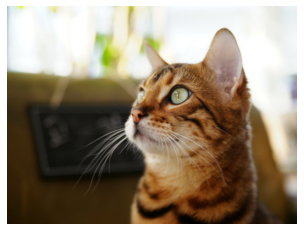

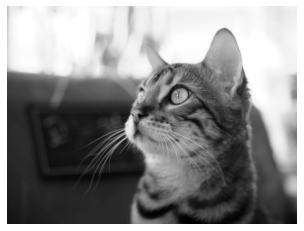

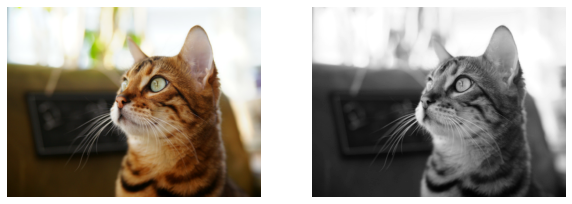

In [11]:
# Output image using matplotlib - matplotlib 사용하여 영상 출력하기
import matplotlib.pyplot as plt
import cv2

image_BGR = cv2.imread('./images/cat.bmp')
image_RGB = cv2.cvtColor(image_BGR, cv2.COLOR_BGR2RGB)  # 영상 색상 정보 순서를 BGR에서 RGB로 전환

# pyplot으로 출력
plt.axis('off')
plt.imshow(image_RGB)  # 컬러 영상 출력

plt.show()

image_GRAY = cv2.imread('./images/cat.bmp', cv2.IMREAD_GRAYSCALE)

plt.axis('off')
plt.imshow(image_GRAY, cmap='gray')  # 그레이스케일 영상 출력

plt.show()

# 두 개의 영상을 함께 출력
plt.figure(figsize=(10, 5))

plt.subplot(121).axis('off')
plt.imshow(image_RGB)

plt.subplot(122).axis('off')
plt.imshow(image_GRAY, cmap='gray')

plt.show()

## <font color = "#CC3D3D">Training #1: Image Slideshow</font>
<hr>

- 개요
    - 특정 폴더에 있는 모든 이미지 파일을 이용하여 슬라이드쇼를 수행
<hr>

- 구현할 기능
    - 1. 특정 폴더에 있는 이미지 파일 목록 읽기
    - 2. 이미지를 전체 화면으로 출력하기
    - 3. 일정 시간동안 이미지를 화면에 출력하고, 다음 이미지로 교체하기(무한루프)

In [ ]:
'''
# Project : Image slideshow - 프로젝트 : 이미지 슬라이드 쇼
import cv2

# 특정 폴더에 있는 이미지 파일(*.jpg) 목록 읽기

# 방법 1
import os
file_list = os.listdir('./images/slideshow')
image_files = [file for file in file_list if file.endswith('.jpg')]
print(image_files, type(image_files), sep='\n\n')

print('-'*50)

# 방법 2
import glob
image_files = glob.glob('./images/slideshow/*.jpg')
print(image_files, type(image_files), sep='\n\n')

#### 나의 pick : 방법 2 - 작성해야할 실행문이 두 번에서 한 번으로 줄어드는 것으로 보아
####          : 일반적으로 이 방법이 더욱 효율적으로 보인다.

# 전체 화면 영상 출력 창 만들기
cv2.namedWindow('slideshow', cv2.WINDOW_NORMAL)
cv2.setWindowProperty('slideshow', cv2.WND_PROP_FULLSCREEN, cv2.WINDOW_FULLSCREEN)

# 불러온 영상을 반복적으로 출력하기
count = len(image_files)
index = 0

while True:
    image = cv2.imread(image_files[index])
    
    if image is None:
        print('Image load failed!')
        break
    
    cv2.imshow('slideshow', image)
    # 키보드의 아무키나 눌러도 그에 해당하는 아스키 값은 0보다 크기 때문에
    # 아래 if 조건문이 작동되고 루프를 탈출한다.
    if cv2.waitKey(1000) >= 0:  # 임의의 키보드 자판을 누를 시
        break
    
    index += 1
    if index >= count:
        index = 0
        
cv2.destroyAllWindows()
cv2.waitKey(1)
'''
#### TODO : 맥북에서 cv2.setWindowProperty() 함수를 이용하여 전체 화면으로 영상을 출력하면
#### 가상 윈도우 창이 닫히지 않고, 심지어 다른 화면으로 이동조차 불가하다.
#### 무엇이 문제인지 구글링을 통해 알아보아도 나오질 않는다.
#### 많이 심각한 것은 아니지만 찝찝하다. 해결 방안 모색 필요함.